In [84]:
import pandas as pd
from matplotlib.cm import coolwarm
import numpy as np
df=pd.read_csv('Du_lieu_dt_4.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df=df.dropna(axis=0,how='any')


Task: Calculate the revenue of each manufacturer, draw a business chart, which products have sold best since launch

Product has most sales is iPhone with 41631410000 sales


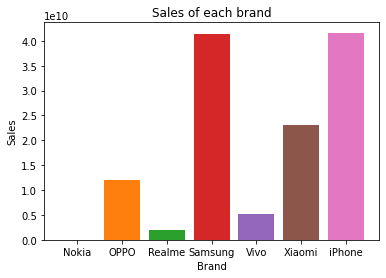

In [85]:
import numpy as np
import matplotlib.pyplot as plt
df1=df
df1['Sales']=df['Gia']*df['So Luong']
df1.head()
sale_values=df1.groupby('Brand').sum()['Sales']
sale_values
for i,y in sale_values.items():
    plt.bar(i,y)
    plt.xlabel('Brand')
    plt.ylabel('Sales')
    plt.title('Sales of each brand')
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')



Task: Find the best-selling and worth-buying phones in the price range of 8 million VND, in which phone sell the most quantity

In [86]:
df2=df
df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]
most_brn=df2_tmp.loc[:,['Name','Brand','Gia','Danh gia','So Luong']]
most_brn.sort_values(by='So Luong',ascending=False,inplace=True)
most_brn




,Name,Brand,Gia,Danh gia,So Luong
52,Điện thoại OPPO A95,OPPO,6990000,4.1,260
55,Điện thoại Xiaomi Redmi Note 10S 6GB,Xiaomi,5990000,4.1,120
56,Điện thoại OPPO A76,OPPO,5990000,4.5,38
53,Điện thoại Vivo Y33s,Vivo,6490000,4.1,27


Product has most quanity is Điện thoại OPPO A95 with 260 sales


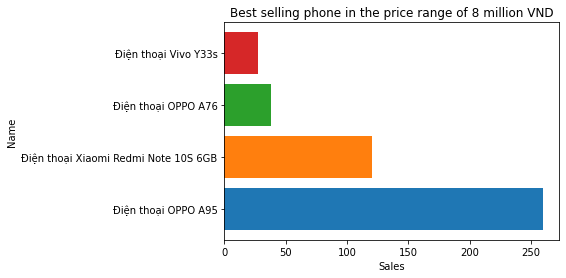

In [87]:
tm_mst=most_brn.groupby('Name').max()['So Luong'].sort_values(ascending=False)

for i, y in tm_mst.items():
    plt.barh(i,y)
    plt.ylabel('Name')
    plt.xlabel('Sales')
    plt.title('Best selling phone in the price range of 8 million VND')
    if y==tm_mst.max():
        print('Product has most quanity is',i,'with',y,'sales')

Task: Find all phones with Snapdragon chip, Comment that products using this chip are appreciated?

In [88]:
def chip_snd(st1):
    st1=st1.split(' ')[0]
    return st1

In [99]:

#df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]

df.head()
df3=df.loc[:,['Name','Chip','Danh gia']]
df3['Chip Sn']=df3['Chip'].apply(chip_snd)
snd_tmp=df3.loc[(df3['Chip Sn']=='Snapdragon')]
snd_tmp2=snd_tmp.groupby('Chip')
snd_tmp2_avg=snd_tmp2.mean()
snd_tmp2_avg=round(snd_tmp2_avg.reset_index(),1)
snd_tmp2_avg
    




,Chip,Danh gia
0,Snapdragon 480 8 nhân 5G,3.1
1,Snapdragon 662,4.1
2,Snapdragon 680 8 nhân,4.2
3,Snapdragon 695 5G 8 nhân,3.8
4,Snapdragon 720G,3.6
5,Snapdragon 730,3.2
6,Snapdragon 732G,3.2
7,Snapdragon 765G,3.5
8,Snapdragon 778G 5G 8 nhân,3.7
9,Snapdragon 8 Gen 1 8 nhân,4.4


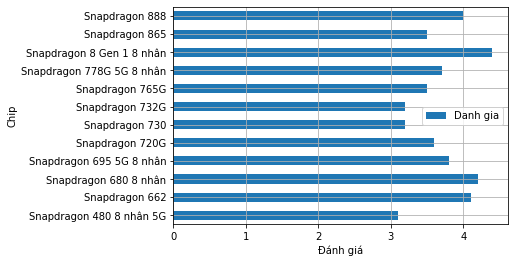

In [108]:
snd_tmp2_avg.plot(x='Chip',y='Danh gia',kind='barh')
plt.xlabel('Đánh giá')

plt.grid()
plt.show()